In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import pandas as pd
import numpy as np

In [3]:
m = Basemap(resolution = 'h', # c, l, i, h, f or None
           projection = 'merc',
           lat_0 = 27.80, lon_0 = -13.20,
           llcrnrlon = 21.01, llcrnrlat = -18.69, urcrnrlon = 34.61, urcrnrlat = -7.56)

(1421,
 5,
 [21.998040874782703, -18.075163999950632, 0.0, 0.0],
 [33.708576224001774, -8.224359999937205, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7f8252e5f0f0>)

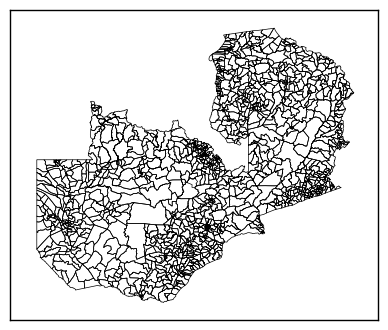

In [28]:
#m.drawmapboundary(fill_color = '#46bcec')
#m.fillcontinents(color='#f2f2f2', lake_color = '#46bcec')
#m.drawcoastlines()
#m.drawcountries()
m.readshapefile('/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/0_originalData/Zambia/administrative_shapefiles/ward/WardShapefiles11June2014/Final_edits_Zambia_Wards_2014t', 'wards')

In [20]:
laborAll = pd.read_csv('/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/3_csvOutput/censuswardlaborall.csv')

In [8]:
print(len(laborAll))
laborAll.head()

1421


,dist,const,ward,wardid,population,pop12plus,lf7days,lf12months,empl7days,empl12months,unem7days,unem12months
0,101,1,1,10100101,16483,9847,5081,5358,4726,5080,355.0,278.0
1,101,1,2,10100102,6814,4112,1436,1576,1267,1385,169.0,191.0
2,101,1,3,10100103,15802,9163,3912,4827,3816,4733,96.0,94.0
3,101,1,4,10100104,21210,13021,6033,6667,5705,6374,328.0,293.0
4,101,1,5,10100105,23635,14142,6376,6523,5884,5905,492.0,618.0


In [21]:
dfPoly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.wards],
        'wardid': [int(ward['ID']) for ward in m.wards_info]
    })

dfPoly = dfPoly.merge(laborAll, on='wardid', how='outer', indicator = True)


In [10]:
dfPoly.head()

,shapes,wardid,dist,const,ward,population,pop12plus,lf7days,lf12months,empl7days,empl12months,unem7days,unem12months,_merge
0,"Poly((200035, 411271) ...)",100113408,1001,134,8,3741,2361,1437,1452,1427,1449,10.0,3.0,both
1,"Poly((187740, 427969) ...)",100113409,1001,134,9,8745,5769,2905,3067,2732,2934,173.0,133.0,both
2,"Poly((156895, 424987) ...)",100113410,1001,134,10,3661,2185,1875,1897,1875,1897,NaN,NaN,both
3,"Poly((152679, 417179) ...)",100113411,1001,134,11,7097,4372,3179,3136,3157,3108,22.0,28.0,both
4,"Poly((188884, 413377) ...)",100113412,1001,134,12,4183,2611,1858,1672,1855,1672,3.0,NaN,both


In [11]:
dfPoly.wardid.groupby(dfPoly._merge).agg([len])

,len
_merge,
left_only,0
right_only,0
both,1431


In [12]:
len(dfPoly.wardid.unique())

1421

In [13]:
dfPoly[['shapes', 'wardid', 'population', '_merge']][dfPoly.wardid.duplicated(keep = False) == True]

,shapes,wardid,population,_merge
337,"Poly((788660, 668732) ...)",20301816,4178,both
338,"Poly((788662, 668733) ...)",20301816,4178,both
339,"Poly((788666, 668737) ...)",20301816,4178,both
340,"Poly((788671, 668741) ...)",20301816,4178,both
341,"Poly((788671, 668741) ...)",20301816,4178,both
580,"Poly((1.23518e+06, 536152) ...)",30304510,10736,both
581,"Poly((1.23518e+06, 536152) ...)",30304510,10736,both
1139,"Poly((579063, 568216) ...)",80410621,3547,both
1140,"Poly((576607, 547808) ...)",80410621,3547,both
1141,"Poly((575844, 549290) ...)",80410621,3547,both


In [94]:
dfPoly[['shapes', 'wardid']][dfPoly.shapes.duplicated(keep = False) == True]

,shapes,wardid


In [71]:
x, bins = pd.qcut(dfPoly.population, 10, labels = False, retbins = True)
binLabels = []
for i in range(10):
    binLabels.append('(' + str(int(bins[i])) + ',' + str(int(bins[i + 1])) + ']')
         

if 'popDeciles' in dfPoly.columns:
    del dfPoly['popDeciles']
dfPoly['popDeciles'] = pd.qcut(dfPoly.population, 10, labels = False)


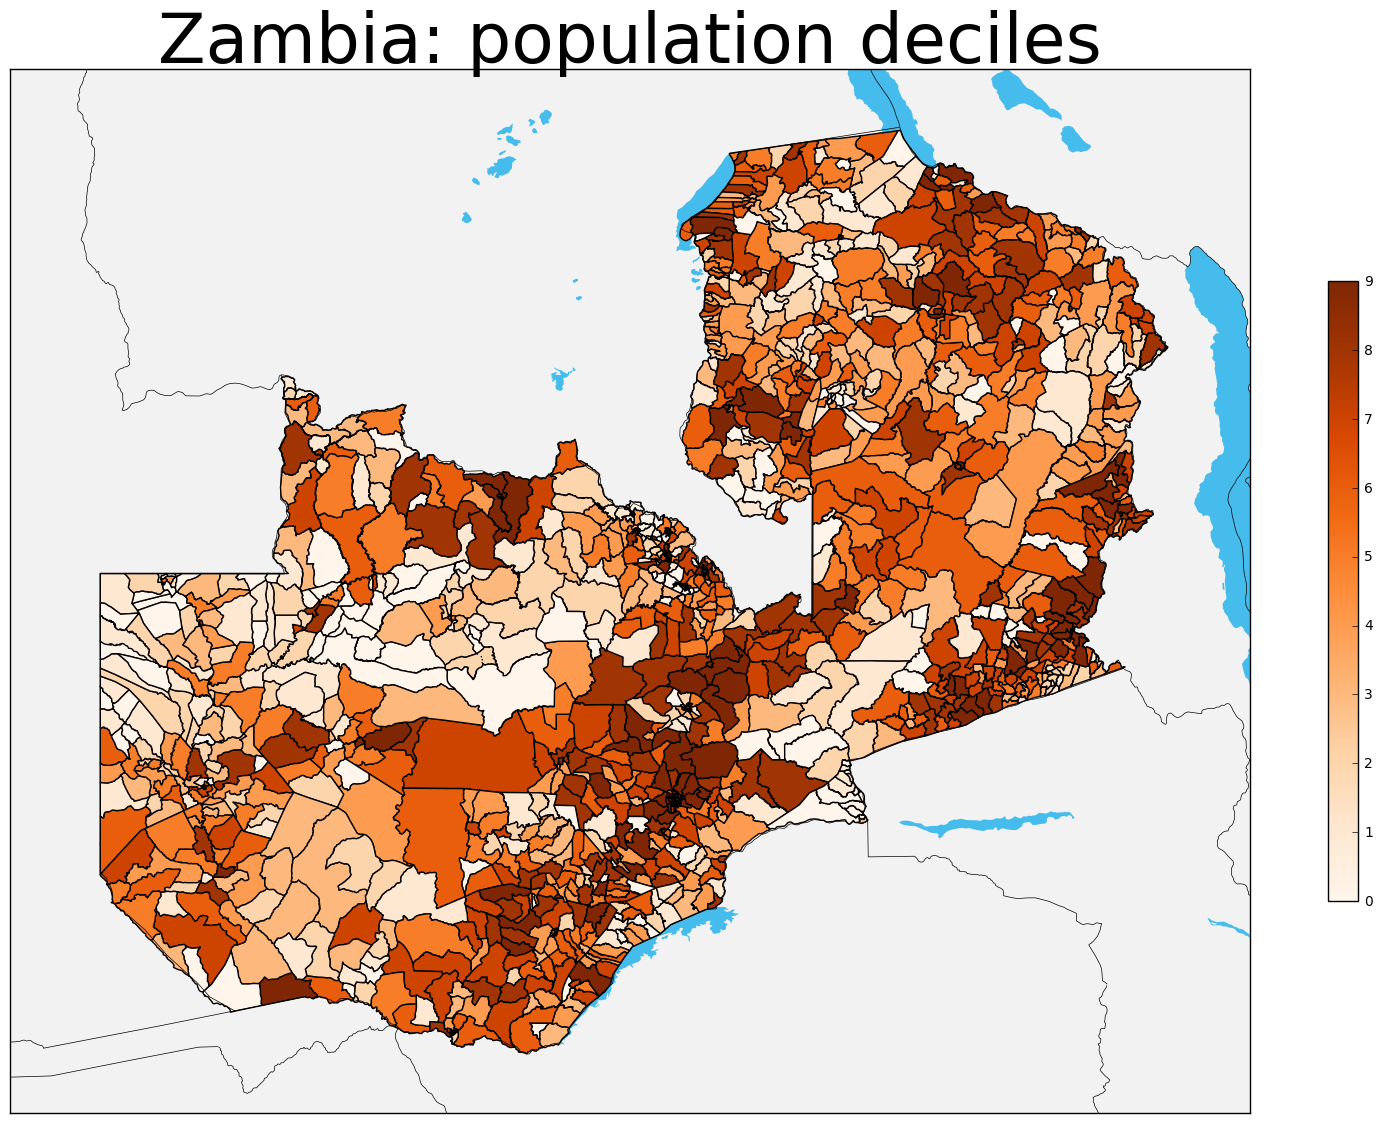

In [73]:
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.get_cmap('Oranges')   

pc = PatchCollection(dfPoly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(dfPoly.popDeciles.fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(dfPoly.popDeciles)

m.drawmapboundary(fill_color = '#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color = '#46bcec')
m.drawcountries()

plt.colorbar(mapper, shrink=0.4)
plt.title('Zambia: population deciles', fontsize = 50)

In [74]:
#pd.qcut(dfPoly.population, 10, retbins = True)

In [60]:
"""
lons = [0, 10 ]
lat = [0, -10]
x,y = map(lons, lats)
map.scatter(x, y, mapper = 'D', color = 'm')
"""

0       2
1       6
2       2
3       5
4       2
5       4
6       5
7       6
8       3
9       2
10      0
11      1
12      0
13      1
14      4
15      2
16      5
17      6
18      1
19      3
20      4
21      5
22      6
23      0
24      1
25      0
26      2
27      5
28      6
29      9
       ..
1401    0
1402    3
1403    4
1404    3
1405    0
1406    7
1407    5
1408    7
1409    9
1410    4
1411    7
1412    4
1413    6
1414    4
1415    8
1416    9
1417    8
1418    5
1419    6
1420    1
1421    9
1422    8
1423    7
1424    6
1425    9
1426    7
1427    9
1428    4
1429    9
1430    0
Name: population, dtype: int64